In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import drive

train_transaction=pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
train_identity=pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
train_transaction.head(5)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [3]:
train_identity.head(5)

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

In [7]:
test_transaction=pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
test_identity=pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')

In [5]:
train_transaction.columns.tolist()

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [6]:
train_identity.columns.tolist()

['TransactionID',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [8]:
# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train=train_transaction.merge(train_identity, how='left',on='TransactionID')
test=test_transaction.merge(test_identity, how='left',on='TransactionID')

In [9]:
object_columns = train.select_dtypes(include=['object']).columns

# Í∞ùÏ≤¥ Ïó¥ÏùÑ Î≤îÏ£º Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏúºÎ°ú Î≥ÄÌôò
train[object_columns] = train[object_columns].astype('category')

print(train.dtypes)

TransactionID        int64
isFraud              int64
TransactionDT        int64
TransactionAmt     float64
ProductCD         category
                    ...   
id_36             category
id_37             category
id_38             category
DeviceType        category
DeviceInfo        category
Length: 434, dtype: object


In [10]:
data_types_dict = train.dtypes.to_dict()
print(data_types_dict)

{'TransactionID': dtype('int64'), 'isFraud': dtype('int64'), 'TransactionDT': dtype('int64'), 'TransactionAmt': dtype('float64'), 'ProductCD': CategoricalDtype(categories=['C', 'H', 'R', 'S', 'W'], ordered=False, categories_dtype=object), 'card1': dtype('int64'), 'card2': dtype('float64'), 'card3': dtype('float64'), 'card4': CategoricalDtype(categories=['american express', 'discover', 'mastercard', 'visa'], ordered=False, categories_dtype=object), 'card5': dtype('float64'), 'card6': CategoricalDtype(categories=['charge card', 'credit', 'debit', 'debit or credit'], ordered=False, categories_dtype=object), 'addr1': dtype('float64'), 'addr2': dtype('float64'), 'dist1': dtype('float64'), 'dist2': dtype('float64'), 'P_emaildomain': CategoricalDtype(categories=['aim.com', 'anonymous.com', 'aol.com', 'att.net',
                  'bellsouth.net', 'cableone.net', 'centurylink.net',
                  'cfl.rr.com', 'charter.net', 'comcast.net', 'cox.net',
                  'earthlink.net', 'embar

## XGBoost Î™®Îç∏ÎßÅ

In [10]:
X = train.drop(columns=['isFraud'])
y= train['isFraud']

In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 590540 entries, 0 to 590539
Series name: isFraud
Non-Null Count   Dtype
--------------   -----
590540 non-null  int64
dtypes: int64(1)
memory usage: 4.5 MB


In [22]:
unique_values = y.unique()
print(unique_values)

[0 1]


Accuracy: 98.13729806617671


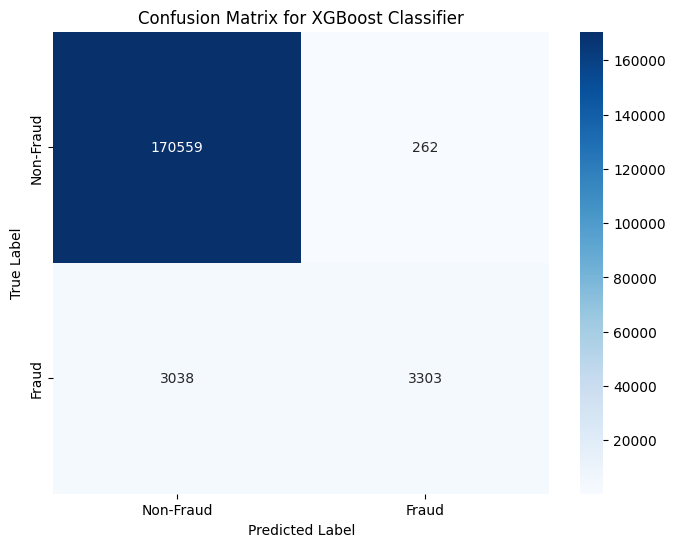

              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    170821
       Fraud       0.93      0.52      0.67      6341

    accuracy                           0.98    177162
   macro avg       0.95      0.76      0.83    177162
weighted avg       0.98      0.98      0.98    177162



'\n              precision    recall  f1-score   support\n\n   Non-Fraud       0.98      1.00      0.99    170821\n       Fraud       0.93      0.52      0.67      6341\n\n    accuracy                           0.98    177162\n   macro avg       0.95      0.76      0.83    177162\nweighted avg       0.98      0.98      0.98    177162\n'

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'verbosity': 0
}

# DMatrix ÏÉùÏÑ±
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Î™®Îç∏ ÌõàÎ†®
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_pred = xgb_model.predict(dtest)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # ÌôïÎ•†ÏùÑ Ïù¥ÏßÑ Í∞íÏúºÎ°ú Î≥ÄÌôò

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy * 100)

# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_test, y_pred_binary)

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú Ï∂úÎ†•
report = classification_report(y_test, y_pred_binary, target_names=['Non-Fraud', 'Fraud'])
print(report)



'''
              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    170821
       Fraud       0.93      0.52      0.67      6341

    accuracy                           0.98    177162
   macro avg       0.95      0.76      0.83    177162
weighted avg       0.98      0.98      0.98    177162
'''

üìå Accuracy: 98.04698524514286


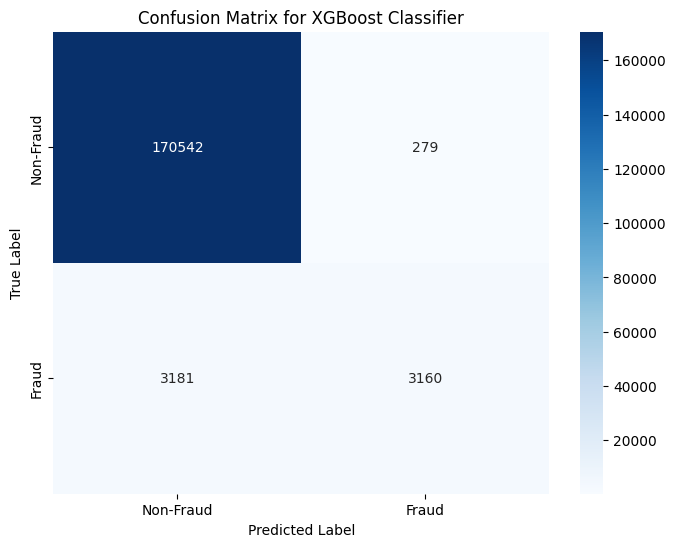


üìå Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    170821
       Fraud       0.92      0.50      0.65      6341

    accuracy                           0.98    177162
   macro avg       0.95      0.75      0.82    177162
weighted avg       0.98      0.98      0.98    177162

‚úÖ Done! Predictions saved to 'simple_xgboost1.csv'


In [47]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 2. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 3. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©
    train[col] = le.fit_transform(train[col].astype(str))

    # ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò¨ Í≤ΩÏö∞ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # Ïù∏ÏΩîÎçî Ï†ÄÏû•

# ‚úÖ 4. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])  # Feature Îç∞Ïù¥ÌÑ∞
y = train['isFraud']  # Target Î≥ÄÏàò
X_test_final = test.copy()  # ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Ï†úÏ∂úÏö©)

# ‚úÖ 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ & Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ‚úÖ 6. XGBoost ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'verbosity': 0
}

# ‚úÖ 7. XGBoost Î™®Îç∏ ÌõàÎ†®
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dtest_final = xgb.DMatrix(X_test_final)  # ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# ‚úÖ 8. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Threshold 0.5)
y_pred = xgb_model.predict(dtest)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # ÌôïÎ•†ÏùÑ Ïù¥ÏßÑ Í∞íÏúºÎ°ú Î≥ÄÌôò

# ‚úÖ 9. Ï†ïÌôïÎèÑ Î∞è ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
accuracy = accuracy_score(y_test, y_pred_binary)
print("üìå Accuracy:", accuracy * 100)

# ‚úÖ 10. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# ‚úÖ 11. Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú Ï∂úÎ†•
print("\nüìå Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Non-Fraud', 'Fraud']))

# ‚úÖ 12. ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Ï†úÏ∂úÏö©)
test_predictions = xgb_model.predict(dtest_final)

# ‚úÖ 13. Í≤∞Í≥º CSV Ï†ÄÏû•
sample_submission['isFraud'] = test_predictions  # ÏòàÏ∏° ÌôïÎ•† Ï†ÄÏû•
sample_submission.to_csv('simple_xgboost1.csv', index=False)
print("‚úÖ Done! Predictions saved to 'simple_xgboost1.csv'")


## Fraud ÌÅ¥ÎûòÏä§ ÏòàÏ∏°Ïùò Ï†ïÌôïÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Î∞©Î≤ï

In [34]:
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞ + SMOTE Ï†ÅÏö©
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# ÏàòÏπòÌòï & Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
num_imputer = SimpleImputer(strategy='mean')  # ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑†Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
X_train_numeric = pd.DataFrame(num_imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_numeric = pd.DataFrame(num_imputer.transform(X_test[numeric_cols]), columns=numeric_cols)

cat_imputer = SimpleImputer(strategy='most_frequent')  # Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÏµúÎπàÍ∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
X_train_categorical = pd.DataFrame(cat_imputer.fit_transform(X_train[categorical_cols]), columns=categorical_cols)
X_test_categorical = pd.DataFrame(cat_imputer.transform(X_test[categorical_cols]), columns=categorical_cols)

# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º ÎùºÎ≤® Ïù∏ÏΩîÎî© (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°úÎßå Î≥ÄÌôò)
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train_categorical[col] = le.fit_transform(X_train_categorical[col])

    # ÏÉàÎ°úÏö¥ Í∞íÏù¥ Îì±Ïû•Ìï† Í≤ΩÏö∞Î•º ÎåÄÎπÑÌï¥ ÎØ∏Î¶¨ Î≥ÄÌôòÍ∞íÏùÑ ÏÑ§Ï†ï
    known_labels = set(le.classes_)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÇ¨Ïö©Ìïú ÌÅ¥ÎûòÏä§ Ï†ÄÏû•
    X_test_categorical[col] = X_test_categorical[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ÏÉàÎ°úÏö¥ Í∞íÏùÑ Ìè¨Ìï®ÌïòÎèÑÎ°ù LabelEncoder Ïû¨Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    X_test_categorical[col] = le.transform(X_test_categorical[col])

    label_encoders[col] = le  # ÌïÑÏöîÌïòÎ©¥ Ï†ÄÏû•

# ÏàòÏπòÌòï + Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
X_train_processed = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_processed = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# SMOTE Ï†ÅÏö© (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎßå)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# XGBoost Î™®Îç∏ ÌõàÎ†®
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_resampled, y_train_resampled)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred_resampled = xgb_model.predict(X_test_processed)
print(classification_report(y_test, y_pred_resampled))

'''
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.87      0.47      0.61      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.74      0.80    177162
weighted avg       0.98      0.98      0.98    177162
'''
# ÏÑ±Îä• Í∞êÏÜå.



              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.87      0.47      0.61      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.74      0.80    177162
weighted avg       0.98      0.98      0.98    177162



Accuracy: 93.2970953138935


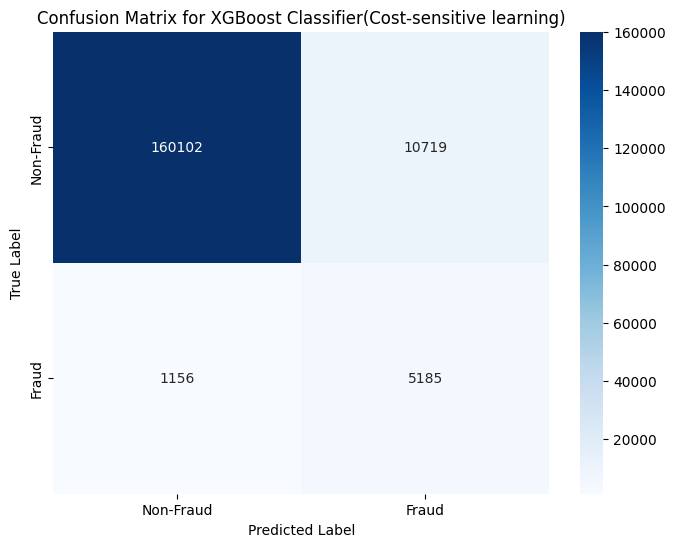

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    170821
           1       0.33      0.82      0.47      6341

    accuracy                           0.93    177162
   macro avg       0.66      0.88      0.72    177162
weighted avg       0.97      0.93      0.95    177162



'\nAccuracy: 93.2970953138935\n              precision    recall  f1-score   support\n\n           0       0.99      0.94      0.96    170821\n           1       0.33      0.82      0.47      6341\n\n    accuracy                           0.93    177162\n   macro avg       0.66      0.88      0.72    177162\nweighted avg       0.97      0.93      0.95    177162\n'

In [30]:
# ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ÎßÅ Ï†ÅÏö©
# ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïóê Îçî ÌÅ∞ ÎπÑÏ§ë Î∂ÄÏó¨
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,
    'verbosity': 0
}

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_cost_sensitive = xgb_model.predict(dtest)
y_pred_binary_cost_sensitive = np.where(y_pred_cost_sensitive > 0.5, 1, 0)

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred_binary_cost_sensitive)
print("Accuracy:", accuracy * 100)

# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_test, y_pred_binary_cost_sensitive)

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier(Cost-sensitive learning)')
plt.show()

# ÌèâÍ∞Ä
print(classification_report(y_test, y_pred_binary_cost_sensitive))

'''
Accuracy: 93.2970953138935
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    170821
           1       0.33      0.82      0.47      6341

    accuracy                           0.93    177162
   macro avg       0.66      0.88      0.72    177162
weighted avg       0.97      0.93      0.95    177162
'''


## XGBoost vs. ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏
### ÏÑ±Îä•Í∞úÏÑ† Î∂ÑÏÑù Í≤∞Î°†

üöÄ ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏Ïù¥ ÏÇ¨Í∏∞ ÌÉêÏßÄ ÏÑ±Îä•(Recall)ÏùÑ ÌÅ¨Í≤å Í∞úÏÑ†ÌñàÏúºÎ©∞, Í∏àÏúµ ÏÇ¨Í∏∞ ÌÉêÏßÄ Í¥ÄÏ†êÏóêÏÑú Îçî Ìö®Í≥ºÏ†Å

‚ö† Ï†ïÏÉÅ Í±∞ÎûòÎ•º ÏÇ¨Í∏∞Î°ú ÏûòÎ™ª ÌÉêÏßÄÌïòÎäî ÎπÑÏú®(**False** Positive)Ïù¥ ÎÜíÏïÑÏ°åÏúºÎØÄÎ°ú Threshold Ï°∞Ï†ïÏù¥ ÌïÑÏöî

üìå ÏÇ¨Í∏∞ ÌÉêÏßÄ Î™©Ï†ÅÏù¥ÎùºÎ©¥ ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ÏùÑ Ïú†ÏßÄÌïòÍ≥†, Threshold ÏµúÏ†ÅÌôî Î∞è Ï∂îÍ∞Ä ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ ÏßÑÌñâÌïòÎ©¥ Îçî Í∞úÏÑ† Í∞ÄÎä•!

## Ï∂îÍ∞Ä Í∞úÏÑ†

### Threshold Ï°∞Ï†ïÌïòÏó¨ False Positive Ï§ÑÏù¥Í∏∞

Optimal Threshold: 0.5400
Accuracy: 94.26174913356137


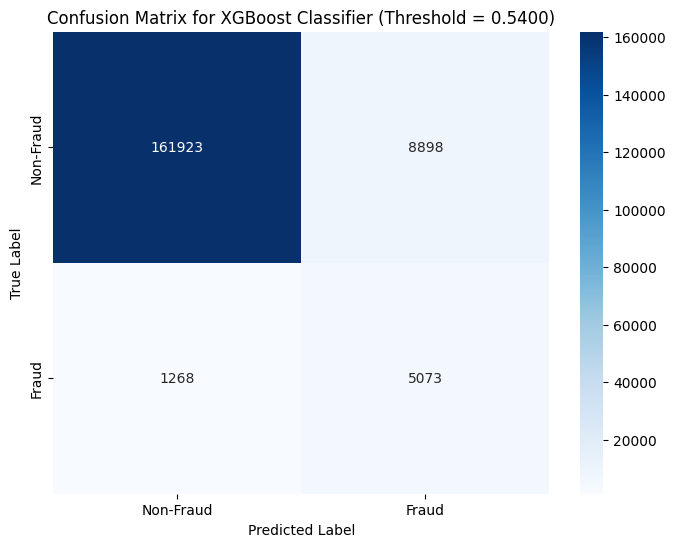


Updated Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    170821
           1       0.36      0.80      0.50      6341

    accuracy                           0.94    177162
   macro avg       0.68      0.87      0.73    177162
weighted avg       0.97      0.94      0.95    177162



In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report

# ‚úÖ Booster Î™®Îç∏ÏóêÏÑú ÌôïÎ•†Í∞í Í∞ÄÏ†∏Ïò§Í∏∞ (predict() ÏÇ¨Ïö©)
y_probs = xgb_model.predict(dtest)  # ÏÇ¨Í∏∞(1)Ïùº ÌôïÎ•†Í∞í Î∞òÌôò (0~1 ÏÇ¨Ïù¥ Í∞í)

# ‚úÖ Precision-Recall Curve Í≥ÑÏÇ∞
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# ‚úÖ ÏµúÏ†ÅÏùò Threshold Ï∞æÍ∏∞ (Recall ‚â• 80%Ïù¥Î©¥ÏÑú Í∞ÄÏû• ÎÜíÏùÄ PrecisionÏùÑ Í∞ÄÏßÄÎäî Í∞í)
idx = np.where(recalls >= 0.8)[0]  # RecallÏù¥ 80% Ïù¥ÏÉÅÏù∏ Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
if len(idx) > 0:
    best_idx = idx[np.argmax(precisions[idx])]  # Í∑∏Ï§ë PrecisionÏù¥ Í∞ÄÏû• ÎÜíÏùÄ Ïù∏Îç±Ïä§ ÏÑ†ÌÉù
    best_threshold = thresholds[best_idx]
else:
    best_threshold = 0.5  # Default Í∞í (Recall 80% Ïù¥ÏÉÅÏùÑ ÎßåÏ°±ÌïòÎäî ThresholdÍ∞Ä ÏóÜÏùÑ Í≤ΩÏö∞)

print(f"Optimal Threshold: {best_threshold:.4f}")

# ‚úÖ ÏÉàÎ°úÏö¥ ÏûÑÍ≥ÑÍ∞í Ï†ÅÏö©ÌïòÏó¨ ÏòàÏ∏°Í∞í Î≥ÄÌôò
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# ‚úÖ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred_adjusted)
print("Accuracy:", accuracy * 100)

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_test, y_pred_adjusted)

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for XGBoost Classifier (Threshold = {best_threshold:.4f})')
plt.show()

# ‚úÖ ÌèâÍ∞Ä
print("\nUpdated Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))


### üéØ Í≤∞Î°†: ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ïÏù¥ Ìö®Í≥ºÏ†ÅÏù∏Í∞Ä?
‚úî Yes!

üìå False Positive(Ï†ïÏÉÅ Í±∞ÎûòÎ•º ÏÇ¨Í∏∞Î°ú ÏûòÎ™ª ÏòàÏ∏°) Í∞úÏàòÍ∞Ä Í∞êÏÜåÌïòÏó¨ PrecisionÏù¥ Í∞úÏÑ†Îê®

üìå RecallÏù¥ ÏïΩÍ∞Ñ ÎÇÆÏïÑÏ°åÏßÄÎßå, Precision-Recall Í∑†ÌòïÏùÑ ÎßûÏ∂îÎäî Í≥ºÏ†ïÏóêÏÑú Î∞úÏÉùÌïòÎäî ÌïÑÏó∞Ï†ÅÏù∏ Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ

üìå Ï†ïÌôïÎèÑÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ÏÑú Îçî Ïã†Î¢∞Ìï† Ïàò ÏûàÎäî Î™®Îç∏Ïù¥ Îê®

üöÄ Í≤∞Î°†Ï†ÅÏúºÎ°ú, ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ + ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ïÏùÑ Ï†ÅÏö©Ìïú Î™®Îç∏Ïù¥ Îçî ÎÇòÏùÄ ÏÑ†ÌÉù!

üìå ÌïòÏßÄÎßå, ÎπÑÏ¶àÎãàÏä§ ÏöîÍµ¨ ÏÇ¨Ìï≠Ïóê Îî∞Îùº Precision vs. RecallÏùò Í∑†ÌòïÏùÑ Ï°∞Ï†ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùå



### Stacking (XGBoost + ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ + ÎπÑÏö© ÎØºÍ∞ê)

Accuracy: 98.03851841817094

üìå Stacking Model Performance with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.87      0.53      0.66      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.76      0.83    177162
weighted avg       0.98      0.98      0.98    177162



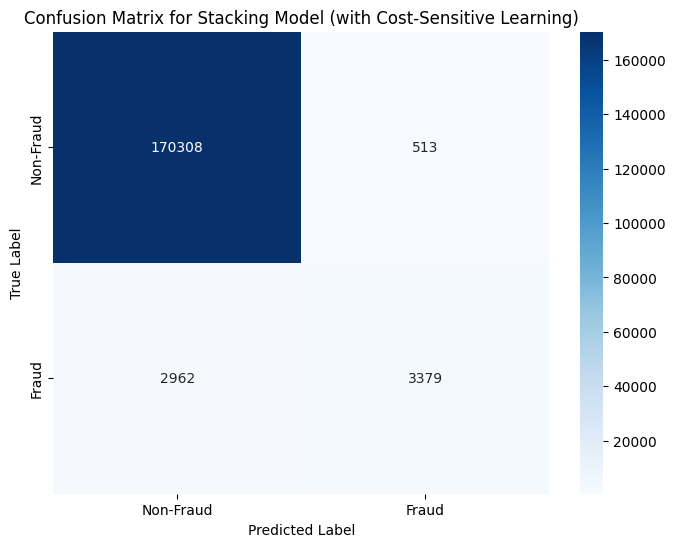

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ‚úÖ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns  # Î≤îÏ£ºÌòï Ïª¨Îüº ÏÑ†ÌÉù
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©

    # ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò¨ Í≤ΩÏö∞ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨
    known_labels = set(le.classes_)
    X_val[col] = X_val[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    X_val[col] = le.transform(X_val[col])

    label_encoders[col] = le  # Ïù∏ÏΩîÎçî Ï†ÄÏû•

# ‚úÖ ÎπÑÏö© ÎØºÍ∞ê XGBoost Î™®Îç∏ ÏÑ§Ï†ï
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,  # ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ Ï†ÅÏö©
    'verbosity': 0
}

# ‚úÖ XGBoost Î™®Îç∏ ÌïôÏäµ (ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ Ï†ÅÏö©)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

# ‚úÖ ÎπÑÏö© ÎØºÍ∞ê ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ (`class_weight='balanced'` Ï†ÅÏö©)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# ‚úÖ Base ModelsÏùò ÏòàÏ∏° Í≤∞Í≥º ÏÉùÏÑ± (ÌôïÎ•† Í∞í ÏÇ¨Ïö©)
xgb_train_prob = xgb_model.predict(dtrain)  # XGBoost ÌôïÎ•† ÏòàÏ∏° (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
xgb_val_prob = xgb_model.predict(dval)  # XGBoost ÌôïÎ•† ÏòàÏ∏° (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)

rf_train_prob = rf_model.predict_proba(X_train)[:, 1]  # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌôïÎ•† ÏòàÏ∏° (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
rf_val_prob = rf_model.predict_proba(X_val)[:, 1]  # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌôïÎ•† ÏòàÏ∏° (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)

# ‚úÖ StackingÏùÑ ÏúÑÌïú ÏÉàÎ°úÏö¥ Feature Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
stacked_train = np.column_stack((xgb_train_prob, rf_train_prob))  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞
stacked_val = np.column_stack((xgb_val_prob, rf_val_prob))  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞

# ‚úÖ ÎπÑÏö© ÎØºÍ∞ê Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (Î©îÌÉÄ Î™®Îç∏) ÌïôÏäµ (`class_weight='balanced'` Ï†ÅÏö©)
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(stacked_train, y_train)

# ‚úÖ ÏµúÏ¢Ö ÏòàÏ∏° ÏàòÌñâ
y_pred_stacked = meta_model.predict(stacked_val)

# ‚úÖ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_val, y_pred_stacked)
print("Accuracy:", accuracy * 100)

# ‚úÖ ÏÑ±Îä• ÌèâÍ∞Ä
print("\nüìå Stacking Model Performance with Cost-Sensitive Learning:")
print(classification_report(y_val, y_pred_stacked))

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
cm = confusion_matrix(y_val, y_pred_stacked)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model (with Cost-Sensitive Learning)')
plt.show()

Accuracy: 98.05601652724624

üìå Stacking Model Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.90      0.51      0.65      6341

    accuracy                           0.98    177162
   macro avg       0.94      0.76      0.82    177162
weighted avg       0.98      0.98      0.98    177162



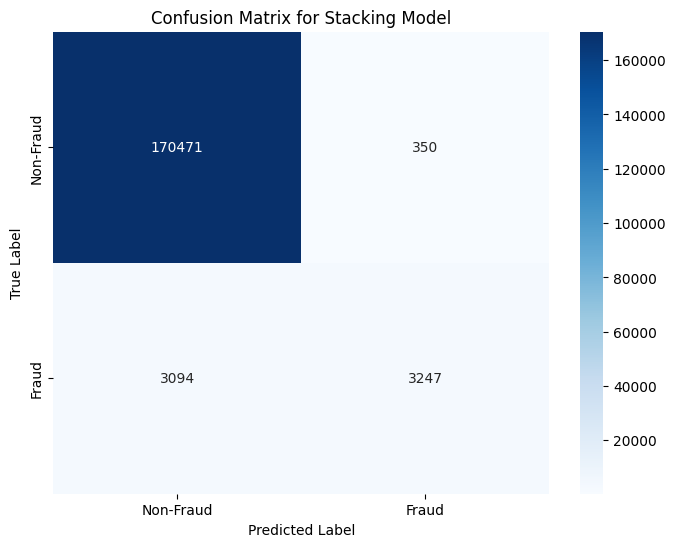

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ‚úÖ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns  # Î≤îÏ£ºÌòï Ïª¨Îüº ÏÑ†ÌÉù
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©

    # ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò¨ Í≤ΩÏö∞ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨
    known_labels = set(le.classes_)
    X_val[col] = X_val[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    X_val[col] = le.transform(X_val[col])

    label_encoders[col] = le  # Ïù∏ÏΩîÎçî Ï†ÄÏû•

# ‚úÖ ÎπÑÏö© ÎØºÍ∞ê XGBoost Î™®Îç∏ ÏÑ§Ï†ï
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,
    'verbosity': 0
}

# ‚úÖ XGBoost Î™®Îç∏ ÌïôÏäµ
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

# ‚úÖ ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ‚úÖ Base ModelsÏùò ÏòàÏ∏° Í≤∞Í≥º ÏÉùÏÑ± (ÌôïÎ•† Í∞í ÏÇ¨Ïö©)
xgb_train_prob = xgb_model.predict(dtrain)  # XGBoost ÌôïÎ•† ÏòàÏ∏° (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
xgb_val_prob = xgb_model.predict(dval)  # XGBoost ÌôïÎ•† ÏòàÏ∏° (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)

rf_train_prob = rf_model.predict_proba(X_train)[:, 1]  # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌôïÎ•† ÏòàÏ∏° (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
rf_val_prob = rf_model.predict_proba(X_val)[:, 1]  # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌôïÎ•† ÏòàÏ∏° (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)

# ‚úÖ StackingÏùÑ ÏúÑÌïú ÏÉàÎ°úÏö¥ Feature Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
stacked_train = np.column_stack((xgb_train_prob, rf_train_prob))  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞
stacked_val = np.column_stack((xgb_val_prob, rf_val_prob))  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞

# ‚úÖ Meta Model (ÏµúÏ¢Ö Î™®Îç∏) ÌïôÏäµ (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏÇ¨Ïö©)
meta_model = LogisticRegression()
meta_model.fit(stacked_train, y_train)

# ‚úÖ ÏµúÏ¢Ö ÏòàÏ∏° ÏàòÌñâ
y_pred_stacked = meta_model.predict(stacked_val)

# ‚úÖ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_val, y_pred_stacked)
print("Accuracy:", accuracy * 100)

# ‚úÖ ÏÑ±Îä• ÌèâÍ∞Ä
print("\nüìå Stacking Model Performance:")
print(classification_report(y_val, y_pred_stacked))

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred_stacked)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

üìå Accuracy: 92.45436380262133


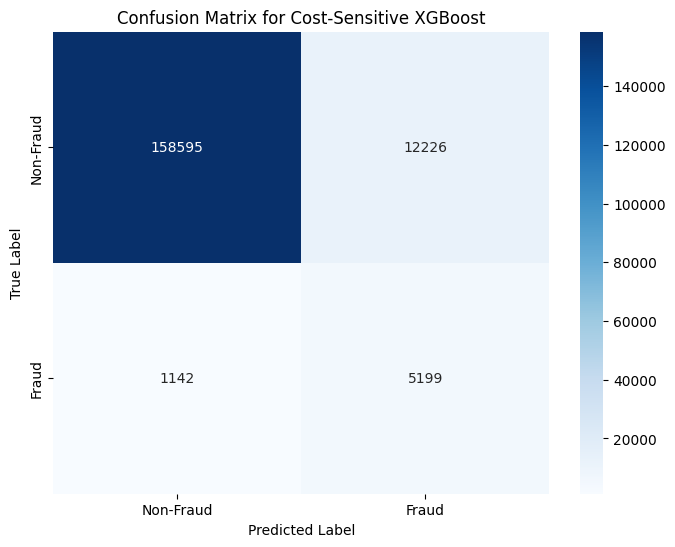


üìå Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    170821
           1       0.30      0.82      0.44      6341

    accuracy                           0.92    177162
   macro avg       0.65      0.87      0.70    177162
weighted avg       0.97      0.92      0.94    177162

‚úÖ Done! Predictions saved to 'simple_xgboost.csv'


In [45]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 2. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 3. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding + Unknown Í∞í Ï≤òÎ¶¨)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©
    train[col] = le.fit_transform(train[col].astype(str))

    # ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò¨ Í≤ΩÏö∞ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # Ïù∏ÏΩîÎçî Ï†ÄÏû•

# ‚úÖ 4. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])  # Feature Îç∞Ïù¥ÌÑ∞
y = train['isFraud']  # Target Î≥ÄÏàò

# ‚úÖ 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ & Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ‚úÖ 6. ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ÎßÅ (ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïóê Îçî ÌÅ∞ ÎπÑÏ§ë Î∂ÄÏó¨)
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,  # ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ Ï†ÅÏö©
    'verbosity': 0
}

# ‚úÖ 7. XGBoost Î™®Îç∏ ÌõàÎ†®
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dtest_final = xgb.DMatrix(test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Ï†úÏ∂úÏö©)

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# ‚úÖ 8. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Threshold 0.5)
y_pred = xgb_model.predict(dtest)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # ÌôïÎ•†ÏùÑ Ïù¥ÏßÑ Í∞íÏúºÎ°ú Î≥ÄÌôò

# ‚úÖ 9. Ï†ïÌôïÎèÑ Î∞è ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
accuracy = accuracy_score(y_test, y_pred_binary)
print("üìå Accuracy:", accuracy * 100)

# ‚úÖ 10. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Cost-Sensitive XGBoost')
plt.show()

# ‚úÖ 11. Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú Ï∂úÎ†•
print("\nüìå Classification Report:")
print(classification_report(y_test, y_pred_binary))

# ‚úÖ 12. ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Ï†úÏ∂úÏö©)
test_predictions = xgb_model.predict(dtest_final)

# ‚úÖ 13. Í≤∞Í≥º CSV Ï†ÄÏû•
sample_submission['isFraud'] = test_predictions  # ÏòàÏ∏° ÌôïÎ•† Ï†ÄÏû•
sample_submission.to_csv('simple_xgboost.csv', index=False)
print("‚úÖ Done! Predictions saved to 'simple_xgboost.csv'")


üìå Accuracy: 98.05545207211479

üìå Stacking Model Performance with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.87      0.54      0.66      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.77      0.83    177162
weighted avg       0.98      0.98      0.98    177162



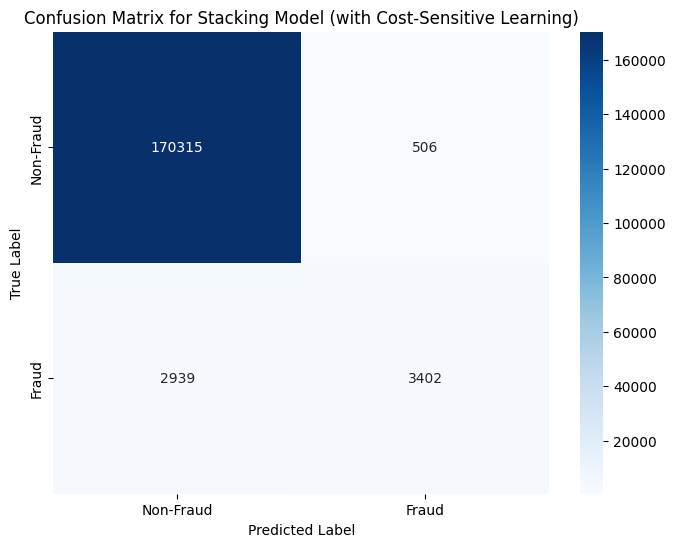

‚úÖ Done! Predictions saved to 'stacking_xgboost_rf.csv'


In [46]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 2. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 3. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding + Unknown Í∞í Ï≤òÎ¶¨)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©
    train[col] = le.fit_transform(train[col].astype(str))

    # ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò¨ Í≤ΩÏö∞ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # Ïù∏ÏΩîÎçî Ï†ÄÏû•

# ‚úÖ 4. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])  # Feature Îç∞Ïù¥ÌÑ∞
y = train['isFraud']  # Target Î≥ÄÏàò
X_test_final = test.copy()  # ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Ï†úÏ∂úÏö©)

# ‚úÖ 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ & Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ‚úÖ 6. ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ÎßÅ (ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïóê Îçî ÌÅ∞ ÎπÑÏ§ë Î∂ÄÏó¨)
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,  # ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ Ï†ÅÏö©
    'verbosity': 0
}

# ‚úÖ 7. XGBoost Î™®Îç∏ ÌõàÎ†® (ÎπÑÏö© ÎØºÍ∞ê Î™®Îç∏ Ï†ÅÏö©)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest_final = xgb.DMatrix(X_test_final)  # ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

# ‚úÖ 8. ÎπÑÏö© ÎØºÍ∞ê ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ (`class_weight='balanced'` Ï†ÅÏö©)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# ‚úÖ 9. Base ModelsÏùò ÏòàÏ∏° Í≤∞Í≥º ÏÉùÏÑ± (ÌôïÎ•† Í∞í ÏÇ¨Ïö©)
xgb_train_prob = xgb_model.predict(dtrain)  # XGBoost ÌôïÎ•† ÏòàÏ∏° (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
xgb_val_prob = xgb_model.predict(dval)  # XGBoost ÌôïÎ•† ÏòàÏ∏° (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)
xgb_test_prob = xgb_model.predict(dtest_final)  # XGBoost ÌôïÎ•† ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)

rf_train_prob = rf_model.predict_proba(X_train)[:, 1]  # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌôïÎ•† ÏòàÏ∏° (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
rf_val_prob = rf_model.predict_proba(X_val)[:, 1]  # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌôïÎ•† ÏòàÏ∏° (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)
rf_test_prob = rf_model.predict_proba(X_test_final)[:, 1]  # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌôïÎ•† ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)

# ‚úÖ 10. StackingÏùÑ ÏúÑÌïú ÏÉàÎ°úÏö¥ Feature Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
stacked_train = np.column_stack((xgb_train_prob, rf_train_prob))  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞
stacked_val = np.column_stack((xgb_val_prob, rf_val_prob))  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
stacked_test = np.column_stack((xgb_test_prob, rf_test_prob))  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

# ‚úÖ 11. ÎπÑÏö© ÎØºÍ∞ê Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (Î©îÌÉÄ Î™®Îç∏) ÌïôÏäµ (`class_weight='balanced'` Ï†ÅÏö©)
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(stacked_train, y_train)

# ‚úÖ 12. ÏµúÏ¢Ö ÏòàÏ∏° ÏàòÌñâ (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ & ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
y_pred_stacked = meta_model.predict(stacked_val)
test_pred_stacked = meta_model.predict_proba(stacked_test)[:, 1]  # ÌôïÎ•† Í∞í Ï†ÄÏû•

# ‚úÖ 13. Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_val, y_pred_stacked)
print("üìå Accuracy:", accuracy * 100)

# ‚úÖ 14. ÏÑ±Îä• ÌèâÍ∞Ä
print("\nüìå Stacking Model Performance with Cost-Sensitive Learning:")
print(classification_report(y_val, y_pred_stacked))

# ‚úÖ 15. ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
cm = confusion_matrix(y_val, y_pred_stacked)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model (with Cost-Sensitive Learning)')
plt.show()

# ‚úÖ 16. ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Ï†úÏ∂úÏö©)
sample_submission['isFraud'] = test_pred_stacked  # ÏòàÏ∏° ÌôïÎ•† Ï†ÄÏû•

# ‚úÖ 17. Í≤∞Í≥º CSV Ï†ÄÏû•
sample_submission.to_csv('stacking_xgboost_rf.csv', index=False)
print("‚úÖ Done! Predictions saved to 'stacking_xgboost_rf.csv'")


In [49]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 22.8 MB/s eta 0:00:00


In [50]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 2. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 3. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©
    train[col] = le.fit_transform(train[col].astype(str))

    # ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò¨ Í≤ΩÏö∞ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # Ïù∏ÏΩîÎçî Ï†ÄÏû•

# ‚úÖ 4. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])  # Feature Îç∞Ïù¥ÌÑ∞
y = train['isFraud']  # Target Î≥ÄÏàò
X_test_final = test.copy()  # ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Ï†úÏ∂úÏö©)

# ‚úÖ 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ & Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 6. Feature Scaling (Ïã†Í≤ΩÎßùÏùÑ ÏúÑÌïú StandardScaler Ï†ÅÏö©)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# ‚úÖ 7. Gradient Boosting Î™®Îç∏ ÌïôÏäµ (XGBoost + LGBM + CatBoost)
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0)

# ‚úÖ 8. Î™®Îç∏ ÌõàÎ†®
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

# ‚úÖ 9. Neural Network Model (MLP Ïã†Í≤ΩÎßù)
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ‚úÖ 10. Ïã†Í≤ΩÎßù ÌõàÎ†®
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=512, validation_data=(X_val_scaled, y_val))

# ‚úÖ 11. Stacking Model (XGBoost + LGBM + CatBoost + Neural Network)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

stacking_model.fit(X_train, y_train)

# ‚úÖ 12. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_pred = stacking_model.predict(X_val)

# ‚úÖ 13. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
accuracy = accuracy_score(y_val, y_pred)
print("üìå Stacking Model Accuracy:", accuracy * 100)
print("\nüìå Classification Report:")
print(classification_report(y_val, y_pred))

# ‚úÖ 14. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

# ‚úÖ 15. ÏµúÏ¢Ö ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
test_pred_xgb = xgb_model.predict_proba(X_test_final)[:, 1]
test_pred_lgb = lgb_model.predict_proba(X_test_final)[:, 1]
test_pred_cb = cb_model.predict_proba(X_test_final)[:, 1]

# ‚úÖ 16. ÌèâÍ∑† ÏïôÏÉÅÎ∏î
test_pred_final = (test_pred_xgb + test_pred_lgb + test_pred_cb) / 3

# ‚úÖ 17. CSV Ï†ÄÏû•
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb_nn.csv', index=False)
print("‚úÖ Done! Predictions saved to 'stacking_xgb_lgb_cb_nn.csv'")


[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.404797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39346
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 6ms/step - accuracy: 0.9654 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 2/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9651 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 3/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9655 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 4/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9653 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 5/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9647 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 6/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9651 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 7/10
923/923 ‚îÅ‚îÅ‚îÅ

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.435191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38561
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


üìå Stacking Model Accuracy: 96.3795847868053

üìå Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    113866
           1       0.11      0.00      0.00      4242

    accuracy                           0.96    118108
   macro avg       0.54      0.50      0.49    118108
weighted avg       0.93      0.96      0.95    118108



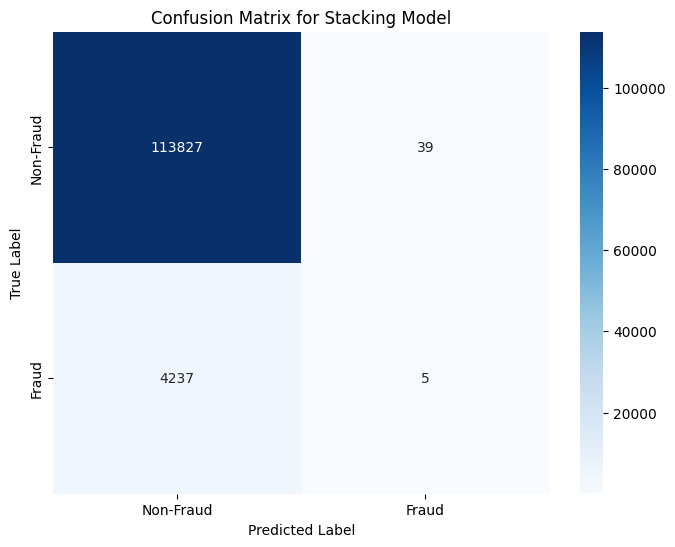

‚úÖ Done! Predictions saved to 'stacking_xgb_lgb_cb.csv'


In [51]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 2. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 3. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©
    train[col] = le.fit_transform(train[col].astype(str))

    # ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò¨ Í≤ΩÏö∞ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # Ïù∏ÏΩîÎçî Ï†ÄÏû•

# ‚úÖ 4. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])  # Feature Îç∞Ïù¥ÌÑ∞
y = train['isFraud']  # Target Î≥ÄÏàò
X_test_final = test.copy()  # ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Ï†úÏ∂úÏö©)

# ‚úÖ 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ & Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 6. Feature Scaling & Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# ‚úÖ 7. Gradient Boosting Î™®Îç∏ ÌïôÏäµ (XGBoost + LGBM + CatBoost)
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0)

# ‚úÖ 8. Î™®Îç∏ ÌõàÎ†®
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

# ‚úÖ 9. Stacking Model (XGBoost + LGBM + CatBoost)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

# ‚úÖ 10. Stacking Î™®Îç∏ ÌõàÎ†®
stacking_model.fit(X_train, y_train)

# ‚úÖ 11. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_pred = stacking_model.predict(X_val)

# ‚úÖ 12. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
accuracy = accuracy_score(y_val, y_pred)
print("üìå Stacking Model Accuracy:", accuracy * 100)
print("\nüìå Classification Report:")
print(classification_report(y_val, y_pred))

# ‚úÖ 13. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

# ‚úÖ 14. ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Stacking Î™®Îç∏ ÏÇ¨Ïö©)
test_pred_final = stacking_model.predict_proba(X_test_final)[:, 1]

# ‚úÖ 15. CSV Ï†ÄÏû•
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb.csv', index=False)
print("‚úÖ Done! Predictions saved to 'stacking_xgb_lgb_cb.csv'")


[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.440916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38561
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 5ms/step - accuracy: 0.9687 - loss: 0.1333 - val_accuracy: 0.9717 - val_loss: 0.1025
Epoch 2/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9727 - loss: 0.1026 - val_accuracy: 0.9733 - val_loss: 0.0983
Epoch 3/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9735 - loss: 0.0983 - val_accuracy: 0.9741 - val_loss: 0.0942
Epoch 4/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9746 - loss: 0.0945 - val_accuracy: 0.9747 - val_loss: 0.0957
Epoch 5/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9754 - loss: 0.0915 - val_accuracy: 0.9756 - val_loss: 0.0966
Epoch 6/10
923/923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9760 - loss: 0.0892 - val_accuracy: 0.9762 - val_loss:

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


üìå Stacking Model Accuracy: 96.3795847868053

üìå Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    113866
           1       0.11      0.00      0.00      4242

    accuracy                           0.96    118108
   macro avg       0.54      0.50      0.49    118108
weighted avg       0.93      0.96      0.95    118108



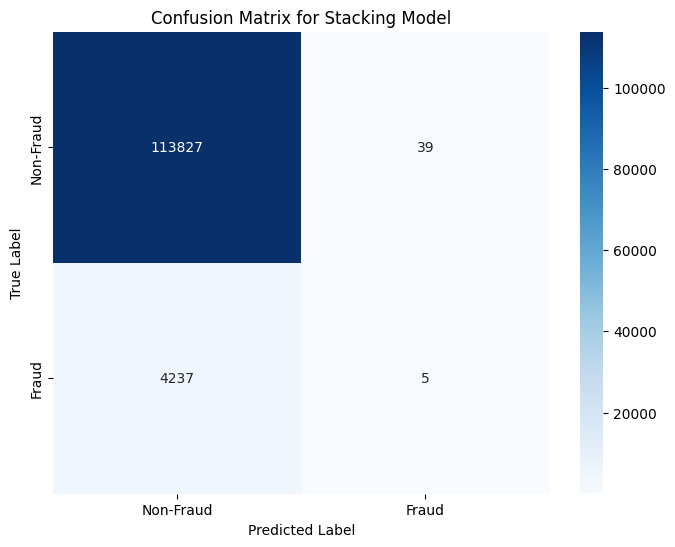

‚úÖ Done! Predictions saved to 'stacking_xgb_lgb_cb_nn.csv'


In [52]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 2. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 3. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©
    train[col] = le.fit_transform(train[col].astype(str))

    # ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò¨ Í≤ΩÏö∞ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # Ïù∏ÏΩîÎçî Ï†ÄÏû•

# ‚úÖ 4. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])  # Feature Îç∞Ïù¥ÌÑ∞
y = train['isFraud']  # Target Î≥ÄÏàò
X_test_final = test.copy()  # ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Ï†úÏ∂úÏö©)

# ‚úÖ 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ & Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 6. Feature Scaling & Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# ‚úÖ 7. Gradient Boosting Î™®Îç∏ ÌïôÏäµ (XGBoost + LGBM + CatBoost)
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0)

# ‚úÖ 8. Î™®Îç∏ ÌõàÎ†®
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

# ‚úÖ 9. Neural Network Model (MLP Ïã†Í≤ΩÎßù)
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ‚úÖ 10. Ïã†Í≤ΩÎßù ÌõàÎ†®
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=512, validation_data=(X_val_scaled, y_val))

# ‚úÖ 11. Stacking Model (XGBoost + LGBM + CatBoost + Neural Network)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

# ‚úÖ 12. Stacking Î™®Îç∏ ÌõàÎ†®
stacking_model.fit(X_train, y_train)

# ‚úÖ 13. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_pred = stacking_model.predict(X_val)

# ‚úÖ 14. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
accuracy = accuracy_score(y_val, y_pred)
print("üìå Stacking Model Accuracy:", accuracy * 100)
print("\nüìå Classification Report:")
print(classification_report(y_val, y_pred))

# ‚úÖ 15. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

# ‚úÖ 16. ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Stacking Î™®Îç∏ ÏÇ¨Ïö©)
test_pred_final = stacking_model.predict_proba(X_test_final)[:, 1]

# ‚úÖ 17. CSV Ï†ÄÏû•
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb_nn.csv', index=False)
print("‚úÖ Done! Predictions saved to 'stacking_xgb_lgb_cb_nn.csv'")


In [3]:
!pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 383.6/383.6 kB 8.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.8/231.8 kB 23.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.5/78.5 kB 9.8 MB/s eta 0:00:00


In [5]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 23.6 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 2. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 3. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = test[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))
    label_encoders[col] = le

# ‚úÖ 4. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])
y = train['isFraud']
X_test_final = test.copy()

# ‚úÖ 5. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ & Feature Scaling
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test_final = scaler.transform(X_test_final)

# ‚úÖ 6. K-Fold Cross Validation ÏÑ§Ï†ï
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ‚úÖ 7. OptunaÎ•º ÏÇ¨Ïö©Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî
def objective(trial):
    params_xgb_lgb = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }

    params_cb = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10)
    }

    xgb_model = xgb.XGBClassifier(**params_xgb_lgb, eval_metric="logloss")
    lgb_model = lgb.LGBMClassifier(**params_xgb_lgb, metric="binary_logloss")
    cb_model = cb.CatBoostClassifier(**params_cb, verbose=0)

    scores = []
    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        xgb_model.fit(X_train, y_train)
        lgb_model.fit(X_train, y_train)
        cb_model.fit(X_train, y_train)

        preds = (xgb_model.predict_proba(X_val)[:, 1] +
                 lgb_model.predict_proba(X_val)[:, 1] +
                 cb_model.predict_proba(X_val)[:, 1]) / 3
        score = accuracy_score(y_val, preds.round())
        scores.append(score)

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params_xgb_lgb = {k: v for k, v in study.best_params.items() if k in ['n_estimators', 'learning_rate', 'max_depth', 'subsample', 'colsample_bytree']}
best_params_cb = {k: v for k, v in study.best_params.items() if k in ['iterations', 'learning_rate', 'depth']}
print("üìå Best Hyperparameters (XGB & LGBM):", best_params_xgb_lgb)
print("üìå Best Hyperparameters (CatBoost):", best_params_cb)

# ‚úÖ 8. ÏµúÏ†ÅÌôîÎêú Î™®Îç∏ ÌïôÏäµ
xgb_model = xgb.XGBClassifier(**best_params_xgb_lgb, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(**best_params_xgb_lgb, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(**best_params_cb, verbose=0)

xgb_model.fit(X, y)
lgb_model.fit(X, y)
cb_model.fit(X, y)

# ‚úÖ 9. Stacking Model (XGBoost + LGBM + CatBoost)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

stacking_model.fit(X, y)

# ‚úÖ 10. ÏµúÏ¢Ö ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
test_pred_final = stacking_model.predict_proba(X_test_final)[:, 1]

# ‚úÖ 11. CSV Ï†ÄÏû•
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb_optuna_kfold_fixed.csv', index=False)
print("‚úÖ Done! Predictions saved to 'stacking_xgb_lgb_cb_optuna_kfold_fixed.csv'")


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import precision_recall_curve
# :Î°úÏºì: Precision-Recall Curve Í≥ÑÏÇ∞
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_val)
# :Î°úÏºì: Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# + Ï†ÑÏ≤òÎ¶¨
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú (Î°úÏª¨ ÌååÏùº Ïú†ÏßÄ)
train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

# ‚úÖ 2. Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÌôò (ÌäπÏàò Î¨∏Ïûê Ï†úÍ±∞)
train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 3. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 4. Ï†ÑÏ≤òÎ¶¨1: 70% Ïù¥ÏÉÅÏù¥ Í≤∞Ï∏°ÏπòÏù∏ Ïª¨Îüº Ï†úÍ±∞
null_percent = train.isnull().mean() * 100
train = train.loc[:, null_percent <= 70]
test = test.loc[:, null_percent <= 70]

# ‚úÖ 5. Ï†ÑÏ≤òÎ¶¨2: ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî 0ÏúºÎ°ú ÎåÄÏ≤¥
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# ‚úÖ 6. Ï†ÑÏ≤òÎ¶¨3: Label Encoding Ï†ÅÏö©
label_encoder = LabelEncoder()
train = train.map(lambda x: str(x) if isinstance(x, (int, float)) else x)
test = test.map(lambda x: str(x) if isinstance(x, (int, float)) else x)

object_columns = train.select_dtypes(include=['object']).columns
for col in object_columns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = test[col].apply(lambda x: x if x in label_encoder.classes_ else 'Unknown')
    label_encoder.classes_ = np.append(label_encoder.classes_, 'Unknown')
    test[col] = label_encoder.transform(test[col])

# ‚úÖ 7. Ï†ÑÏ≤òÎ¶¨4: Standard Scaling Ï†ÅÏö©
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# ‚úÖ 8. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])
y = train['isFraud']
X_test_final = test.copy()

# ‚úÖ 9. K-Fold Cross Validation ÏÑ§Ï†ï
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ‚úÖ 10. OptunaÎ•º ÏÇ¨Ïö©Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî
def objective(trial):
    params_xgb_lgb = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }

    params_cb = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10)
    }

    xgb_model = xgb.XGBClassifier(**params_xgb_lgb, eval_metric="logloss")
    lgb_model = lgb.LGBMClassifier(**params_xgb_lgb, metric="binary_logloss")
    cb_model = cb.CatBoostClassifier(**params_cb, verbose=0)

    scores = []
    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        xgb_model.fit(X_train, y_train)
        lgb_model.fit(X_train, y_train)
        cb_model.fit(X_train, y_train)

        preds = (xgb_model.predict_proba(X_val)[:, 1] +
                 lgb_model.predict_proba(X_val)[:, 1] +
                 cb_model.predict_proba(X_val)[:, 1]) / 3
        score = accuracy_score(y_val, preds.round())
        scores.append(score)

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params_xgb_lgb = {k: v for k, v in study.best_params.items() if k in ['n_estimators', 'learning_rate', 'max_depth', 'subsample', 'colsample_bytree']}
best_params_cb = {k: v for k, v in study.best_params.items() if k in ['iterations', 'learning_rate', 'depth']}
print("üìå Best Hyperparameters (XGB & LGBM):", best_params_xgb_lgb)
print("üìå Best Hyperparameters (CatBoost):", best_params_cb)

# ‚úÖ 11. ÏµúÏ†ÅÌôîÎêú Î™®Îç∏ ÌïôÏäµ
xgb_model = xgb.XGBClassifier(**best_params_xgb_lgb, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(**best_params_xgb_lgb, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(**best_params_cb, verbose=0)

xgb_model.fit(X, y)
lgb_model.fit(X, y)
cb_model.fit(X, y)

# ‚úÖ 12. Stacking Model (XGBoost + LGBM + CatBoost)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

stacking_model.fit(X, y)

# ‚úÖ 13. ÏµúÏ¢Ö ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
test_pred_final = stacking_model.predict_proba(X_test_final)[:, 1]

# ‚úÖ 14. CSV Ï†ÄÏû•
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb_optuna_kfold_final.csv', index=False)
print("‚úÖ Done! Predictions saved to 'stacking_xgb_lgb_cb_optuna_kfold_final.csv'")


In [10]:
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

# ‚úÖ 2. Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÌôò
train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ‚úÖ 3. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ‚úÖ 4. Ï†ÑÏ≤òÎ¶¨: 70% Ïù¥ÏÉÅ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ & ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî 0ÏúºÎ°ú ÎåÄÏ≤¥
null_percent = train.isnull().mean() * 100
train = train.loc[:, null_percent <= 70]
test = test.loc[:, null_percent <= 70]

train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# ‚úÖ 5. Feature & Target Î∂ÑÎ¶¨
X = train.drop(columns=['isFraud'])
y = train['isFraud']
X_test_final = test.copy()

# ‚úÖ 6. Î≤îÏ£ºÌòï Î≥ÄÏàò(Label Encoding) ÏµúÏ†ÅÌôî
object_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Label Encoding Ï†ÅÏö©
    X[col] = le.fit_transform(X[col].astype(str))

    # ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉàÎ°úÏö¥ Í∞íÏù¥ ÎÇòÏò§Î©¥ 'Unknown'ÏúºÎ°ú Ï≤òÎ¶¨ ÌõÑ Label Encoding
    X_test_final[col] = np.where(X_test_final[col].astype(str).isin(le.classes_),
                                  X_test_final[col], 'Unknown')

    # ‚úÖ 'Unknown'ÏùÑ Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§Ïóê Ï∂îÍ∞Ä ÌõÑ Label Encoding Ï†ÅÏö©
    le.classes_ = np.append(le.classes_, 'Unknown')
    X_test_final[col] = le.transform(X_test_final[col].astype(str))

    # ‚úÖ Î≥ÄÌôòÎêú LabelEncoder Ï†ÄÏû•
    label_encoders[col] = le

# ‚úÖ 7. Ïª¨Îüº Ï†ïÎ†¨ (Î∂àÏùºÏπò Î∞©ÏßÄ)
missing_cols = set(X.columns) - set(X_test_final.columns)
extra_cols = set(X_test_final.columns) - set(X.columns)

# ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X_test_final = X_test_final.drop(columns=extra_cols, errors='ignore')

# ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÎäî Ïª¨ÎüºÏùÑ Ï∂îÍ∞Ä (Í∞íÏùÄ 0ÏúºÎ°ú Ï±ÑÏõÄ)
for col in missing_cols:
    X_test_final[col] = 0

# ‚úÖ Ïª¨Îüº ÏàúÏÑú ÎèôÏùºÌïòÍ≤å ÎßûÏ∂îÍ∏∞
X_test_final = X_test_final[X.columns]

# ‚úÖ 8. Standard Scaling Ï†ÅÏö©
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# ‚úÖ 9. K-Fold Cross Validation ÏÑ§Ï†ï
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ‚úÖ XGBoost K-Fold ÌïôÏäµ Î∞è ÏòàÏ∏° Ï†ÄÏû•
xgb_train_meta = np.zeros(X_scaled.shape[0])  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌôïÎ•†Í∞í Ï†ÄÏû•
xgb_test_meta = np.zeros(X_test_scaled.shape[0])  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°Í∞í Ï†ÄÏû•

for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled, y)):
    print(f"\nüìå Fold {fold+1}: Training...")

    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    clf = xgb.XGBClassifier(
        n_estimators=500,
        max_depth=7,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.6,
        random_state=42,
        tree_method='gpu_hist',
        predictor='gpu_predictor'
    )

    clf.fit(X_train, y_train)

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
    y_val_pred_prob = clf.predict_proba(X_val)[:, 1]
    xgb_train_meta[val_idx] = y_val_pred_prob

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°Í∞í ÌèâÍ∑† Í≥ÑÏÇ∞
    xgb_test_meta += clf.predict_proba(X_test_scaled)[:, 1] / kf.n_splits

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
    y_val_pred = np.round(y_val_pred_prob)  # 0 ÎòêÎäî 1Î°ú Î≥ÄÌôò
    cm = confusion_matrix(y_val, y_val_pred)

    print("\n=== Confusion Matrix (XGBoost) ===")
    print(cm)
    print(classification_report(y_val, y_val_pred, digits=4))

# ‚úÖ 10. Logistic Regression Stacking Ï†ÅÏö© (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©)
print("\nüìå Training Logistic Regression for Stacking...")
X_train_meta = xgb_train_meta.reshape(-1, 1)  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌôïÎ•†Í∞í ÏÇ¨Ïö©
X_test_meta = xgb_test_meta.reshape(-1, 1)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌôïÎ•†Í∞í ÏÇ¨Ïö©

log_reg = LogisticRegression(C=0.5)
log_reg.fit(X_train_meta, y)

# ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÏùò ÏòàÏ∏° ÏàòÌñâ
y_val_pred_logreg = log_reg.predict(X_train_meta[val_idx].reshape(-1, 1))  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îßå ÏòàÏ∏°

# ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†• (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)
cm_logreg = confusion_matrix(y.iloc[val_idx], y_val_pred_logreg)  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Ï†úÍ∞íÍ≥º ÎπÑÍµê

print("\nüìå Logistic Regression Stacking Performance (Validation Data Only):")
print(f"Accuracy: {accuracy_score(y.iloc[val_idx], y_val_pred_logreg) * 100:.2f}%")
print("Confusion Matrix:")
print(cm_logreg)
print(classification_report(y.iloc[val_idx], y_val_pred_logreg))

# ‚úÖ 11. ÏµúÏ¢Ö ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
test_pred_final = log_reg.predict_proba(X_test_meta)[:, 1]

# ‚úÖ 12. CSV Ï†ÄÏû•
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('xgb_logreg_gpu_optuna_kfold.csv', index=False)
print("‚úÖ Done! Predictions saved to 'xgb_logreg_gpu_optuna_kfold.csv'")



üìå Fold 1: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:38] WARNING: /workspace/src/common/error_ms


=== Confusion Matrix (XGBoost) ===
[[113815    161]
 [  1999   2133]]
              precision    recall  f1-score   support

           0     0.9827    0.9986    0.9906    113976
           1     0.9298    0.5162    0.6639      4132

    accuracy                         0.9817    118108
   macro avg     0.9563    0.7574    0.8272    118108
weighted avg     0.9809    0.9817    0.9792    118108


üìå Fold 2: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix (XGBoost) ===
[[113803    173]
 [  2056   2076]]
              precision    recall  f1-score   support

           0     0.9823    0.9985    0.9903    113976
           1     0.9231    0.5024    0.6507      4132

    accuracy                         0.9811    118108
   macro avg     0.9527    0.7505    0.8205    118108
weighted avg     0.9802    0.9811    0.9784    118108


üìå Fold 3: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix (XGBoost) ===
[[113798    177]
 [  2002   2131]]
              precision    recall  f1-score   support

           0     0.9827    0.9984    0.9905    113975
           1     0.9233    0.5156    0.6617      4133

    accuracy                         0.9816    118108
   macro avg     0.9530    0.7570    0.8261    118108
weighted avg     0.9806    0.9816    0.9790    118108


üìå Fold 4: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix (XGBoost) ===
[[113816    159]
 [  2063   2070]]
              precision    recall  f1-score   support

           0     0.9822    0.9986    0.9903    113975
           1     0.9287    0.5008    0.6507      4133

    accuracy                         0.9812    118108
   macro avg     0.9554    0.7497    0.8205    118108
weighted avg     0.9803    0.9812    0.9784    118108


üìå Fold 5: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix (XGBoost) ===
[[113798    177]
 [  2123   2010]]
              precision    recall  f1-score   support

           0     0.9817    0.9984    0.9900    113975
           1     0.9191    0.4863    0.6361      4133

    accuracy                         0.9805    118108
   macro avg     0.9504    0.7424    0.8130    118108
weighted avg     0.9795    0.9805    0.9776    118108


üìå Training Logistic Regression for Stacking...

üìå Logistic Regression Stacking Performance (Validation Data Only):
Accuracy: 98.15%
Confusion Matrix:
[[113681    294]
 [  1893   2240]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.88      0.54      0.67      4133

    accuracy                           0.98    118108
   macro avg       0.93      0.77      0.83    118108
weighted avg       0.98      0.98      0.98    118108

‚úÖ Done! Predictions saved to 'xgb_logreg_gpu_optuna_kfold.csv'


#XGBoost + Logistic Regression Stacking + Optuna + K-Fold (5-Fold)
Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
‚úÖ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

‚úÖ ÎùºÎ≤® Ïù∏ÏΩîÎî©(Label Encoding)

‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

XGBoost + Logistic Regression Stacking Ï†ÅÏö©
‚úÖ XGBoostÍ∞Ä ÏòàÏ∏°Ìïú ÌôïÎ•†Í∞íÏùÑ Logistic RegressionÏùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©

‚úÖ XGBoost Îã®Ïùº Î™®Îç∏Ïùò Í∞ïÎ†•Ìïú ÏòàÏ∏°Î†•ÏùÑ ÌôúÏö©ÌïòÎ©¥ÏÑú, Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ

OptunaÎ•º ÌôúÏö©Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî
‚úÖ n_estimators, learning_rate, max_depth Îì± XGBoostÏùò ÌïµÏã¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏûêÎèô ÏµúÏ†ÅÌôî

‚úÖ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú XGBoost ÌïôÏäµ ÏÑ±Îä• Í∑πÎåÄÌôî

K-Fold Cross Validation Ï†ÅÏö©
‚úÖ K-Fold(5-Fold) Ï†ÅÏö©ÌïòÏó¨ ÏùºÎ∞òÌôî ÏÑ±Îä• Ìñ•ÏÉÅ

‚úÖ Îç∞Ïù¥ÌÑ∞Î•º 5Í∞ú FoldÎ°ú ÎÇòÎàÑÏñ¥ XGBoost Î™®Îç∏Ïù¥ Îçî Ïûò ÌïôÏäµÌïòÎèÑÎ°ù Ìï®

## XGBoost test Ïóê Ìï©ÏÑ±

In [ ]:
import gc
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

#############################
# 1) Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
#############################
train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

#############################
# 2) Ïª¨ÎüºÎ™Ö ÏπòÌôò ( '-' ‚Üí '_' )
#############################
for df in [train_transaction, train_identity, test_transaction, test_identity]:
    df.columns = [c.replace('-', '_') for c in df.columns]

#############################
# 3) Train Î≥ëÌï©, Test Î≥ëÌï©
#############################
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test  = test_transaction.merge(test_identity,   how='left', left_index=True, right_index=True)
del train_transaction, train_identity, test_transaction, test_identity
gc.collect()

#############################
# 4) ÌÉÄÍπÉ Î∂ÑÎ¶¨
#############################
y_all = train['isFraud'].copy()
X_all = train.drop('isFraud', axis=1)
X_test = test.copy()
del train, test
gc.collect()

#############################
# 5) Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
#############################
X_all  = X_all.fillna(-999)
X_test = X_test.fillna(-999)

#############################
# 6) ÎùºÎ≤® Ïù∏ÏΩîÎî©
#############################
for col in X_all.columns:
    if X_all[col].dtype == 'object' or X_test[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(X_all[col].values) + list(X_test[col].values))
        X_all[col]  = le.transform(X_all[col].values)
        X_test[col] = le.transform(X_test[col].values)

#############################
# 7) Train/Validation Î∂ÑÌï†
#############################
X_train, X_val, y_train, y_val = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

#############################
# 8) OptunaÎ•º ÌôúÏö©Ìïú XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî
#############################
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10, log=True),
        'tree_method': 'gpu_hist',  # ‚úÖ GPU ÏÇ¨Ïö©
        'predictor': 'gpu_predictor'
    }

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = xgb.XGBClassifier(**params, eval_metric="logloss")
        model.fit(X_tr, y_tr)

        preds = model.predict(X_v)
        score = accuracy_score(y_v, preds)
        scores.append(score)

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params_xgb = study.best_params
best_params_xgb.update({'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor'})

#############################
# 9) K-FoldÎ•º Ïù¥Ïö©Ìïú XGBoost ÌïôÏäµ & ÏòàÏ∏° Ï†ÄÏû•
#############################
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_train_meta = np.zeros(X_train.shape[0])  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
xgb_val_meta = np.zeros(X_val.shape[0])  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
xgb_test_meta = np.zeros(X_test.shape[0])  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"\nüìå Fold {fold+1}: Training...")

    X_tr, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    clf = xgb.XGBClassifier(**best_params_xgb, eval_metric="logloss")
    clf.fit(X_tr, y_tr)

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÌôïÎ•†Í∞í Ï†ÄÏû•
    xgb_train_meta[val_idx] = clf.predict_proba(X_v)[:, 1]
    xgb_val_meta += clf.predict_proba(X_val)[:, 1] / kf.n_splits  # ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌôïÎ•†Í∞í Ï†ÄÏû•
    xgb_test_meta += clf.predict_proba(X_test)[:, 1] / kf.n_splits  # ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌôïÎ•†Í∞í Ï†ÄÏû•

#############################
# 10) Logistic Regression Stacking Ï†ÅÏö©
#############################
X_train_meta = xgb_train_meta.reshape(-1, 1)
X_val_meta = xgb_val_meta.reshape(-1, 1)  # ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌôïÎ•†Í∞í ÏÇ¨Ïö©
X_test_meta = xgb_test_meta.reshape(-1, 1)

log_reg = LogisticRegression(C=0.5)
log_reg.fit(X_train_meta, y_train)

# ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏòàÏ∏°
y_val_pred_logreg = log_reg.predict(X_val_meta)  # ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏàòÌñâ

# ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)
print("\nüìå Logistic Regression Stacking Performance (Validation Data Only):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_logreg) * 100:.2f}%")
print("Confusion Matrix:")
print(cm_logreg)
print(classification_report(y_val, y_val_pred_logreg))

#############################
# 11) ÏµúÏ¢Ö ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
#############################
test_pred_final = log_reg.predict_proba(X_test_meta)[:, 1]

sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('xgb_logreg_gpu_optuna_kfold.csv', index=False)
print("‚úÖ Done! Predictions saved to 'xgb_logreg_gpu_optuna_kfold.csv'")


In [ ]:
# ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏòàÏ∏° ÌôïÎ•†Í∞í Ï∂îÏ∂ú
y_val_proba_logreg = log_reg.predict_proba(X_val_meta)[:, 1]

# ‚úÖ Precision-Recall Curve Ï∂úÎ†•
precision_xgb, recall_xgb, _ = precision_recall_curve(y_val, xgb_val_meta)
precision_logreg, recall_logreg, _ = precision_recall_curve(y_val, y_val_proba_logreg)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, label="XGBoost", linestyle="--", color="blue")
plt.plot(recall_logreg, precision_logreg, label="Logistic Regression Stacking", linestyle="-", color="red")
plt.title("Precision-Recall Curve (Validation)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ‚úÖ 15. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_val, y_val_pred_logreg)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()